# Homework 2 (Full mark: 100pt)
- Questions 1~3: Conceptual
- Questions 4~6: Programming

# Conceptual questions

# 1. Logistic function (5pt)
**Show how to derive the odds, i.e., $\frac{p(X)}{1-p(X)}=e^{\beta_{0}+\beta_{1} X}$, from the logistic function, i.e., $p(X)=\frac{e^{\beta_{0}+\beta_{1} X}}{1+e^{\beta_{0}+\beta_{1} X}}$.**

Let $A=e^{\beta_{0}+\beta_{1} X}$, then, $p(X)=\frac{A}{1-A}$. Therefore, the odds will be equal to $\frac{A}{1-A}:(1-\frac{A}{1-A})$. By setting a common denominator in the second part, we get $\frac{A}{1-A}:(\frac{1-A}{1-A}-\frac{A}{1-A})$, which can be simplified to $\frac{A}{1-A}:\frac{1}{1-A}$. By performing the division, we get $\frac{p(X)}{1-p(X)}=A$, where $A=e^{\beta_{0}+\beta_{1} X}$.

# 2. Discriminant function (10pt)
**Show that under the assumption that the observations in the $k$th class are drawn from a Gaussian distribution $N(\mu_k, \sigma^2)$, the Bayes’ classifier assigns an observation to the class for which the discriminant function is maximized. In other words, show that $\underset{k}{\arg \max } p_{k}(x)=\underset{k}{\arg \max } \delta_{k}(x)$, where $p_{k}(x)=\frac{\pi_{k} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{1}{2 \sigma^{2}}\left(x-\mu_{k}\right)^{2}\right)}{\sum_{l=1}^{K} \pi_{l} \frac{1}{\sqrt{2 \pi} \sigma}  \exp \left(-\frac{1}{2 \sigma^{2}}\left(x-\mu_{l}\right)^{2}\right)}$ and $\delta_{k}(x)=x \cdot \frac{\mu_{k}}{\sigma^{2}}-\frac{\mu_{k}^{2}}{2 \sigma^{2}}+\log \left(\pi_{k}\right)$**

As the log function of $p_k(x)$ is monotonically increasing, we can find k for which the logarithm of numerator (the denominator can be ignored as it is independent from $k$) is the largest, instead of $\underset{k}{\arg \max } p_{k}(x)$. So, the function we need to maximize is $log(\pi_k)-\frac{1}{2\sigma^2}(x-\mu_k)^2$. By expanding the quadratic term, we get $\log \left(\pi_{k}\right) - \frac{x^2}{2\sigma^2} + \frac{x\mu_{k}}{\sigma^{2}}-\frac{\mu_{k}^{2}}{2 \sigma^{2}}$, where we can drop the $\frac{x^2}{2\sigma^2}$ term as it is independent from $k$. As a result, the function to be maximized is equal to $x \cdot \frac{\mu_{k}}{\sigma^{2}}-\frac{\mu_{k}^{2}}{2 \sigma^{2}}+\log \left(\pi_{k}\right)$, which is the $\delta_{k}(x)$ function. Thus, $\underset{k}{\arg \max } p_{k}(x)=\underset{k}{\arg \max } \delta_{k}(x)$.

# 3. LDA vs. QDA (20pt)
**(a) If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?**

**(b) If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?**

**(c) In general, as the sample size $n$ increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?**

**(d) True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer.**


(a) If the Bayes decision boundary is linear, QDA is expected to perform better on the training set due to its higher flexiblity, yielding a closer fit. This will also lead to overfitting, as the flexibility increases the variance error without reduction in bias), and so, LDA will perform better than QDA.

(b) If the Bayes decision bounary is non-linear, we expect QDA to perform better both on the training and test sets, due to its flexibility.

(c) In general, QDA will benefit more if the training set is very large, as the variance of the classifier is not a major concern in big samples.

(d) False. As said in (a), even if the sample size is big enough to model a linear boundary, the flexibilty comes with high variance error without reduction in bias, resulting in overfitting.

# 4. Weekly dataset (25pt)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
 
df = pd.read_csv('data/Weekly.csv')
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


**(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns? For numerical analyses, use ````pandas```` functions such as ````corr()```` and ````describe()````, and for graphical analyses use ````pairplot````, ````boxplot````, and ````scatterplot````.**

In [2]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [3]:
# Write your answer here
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


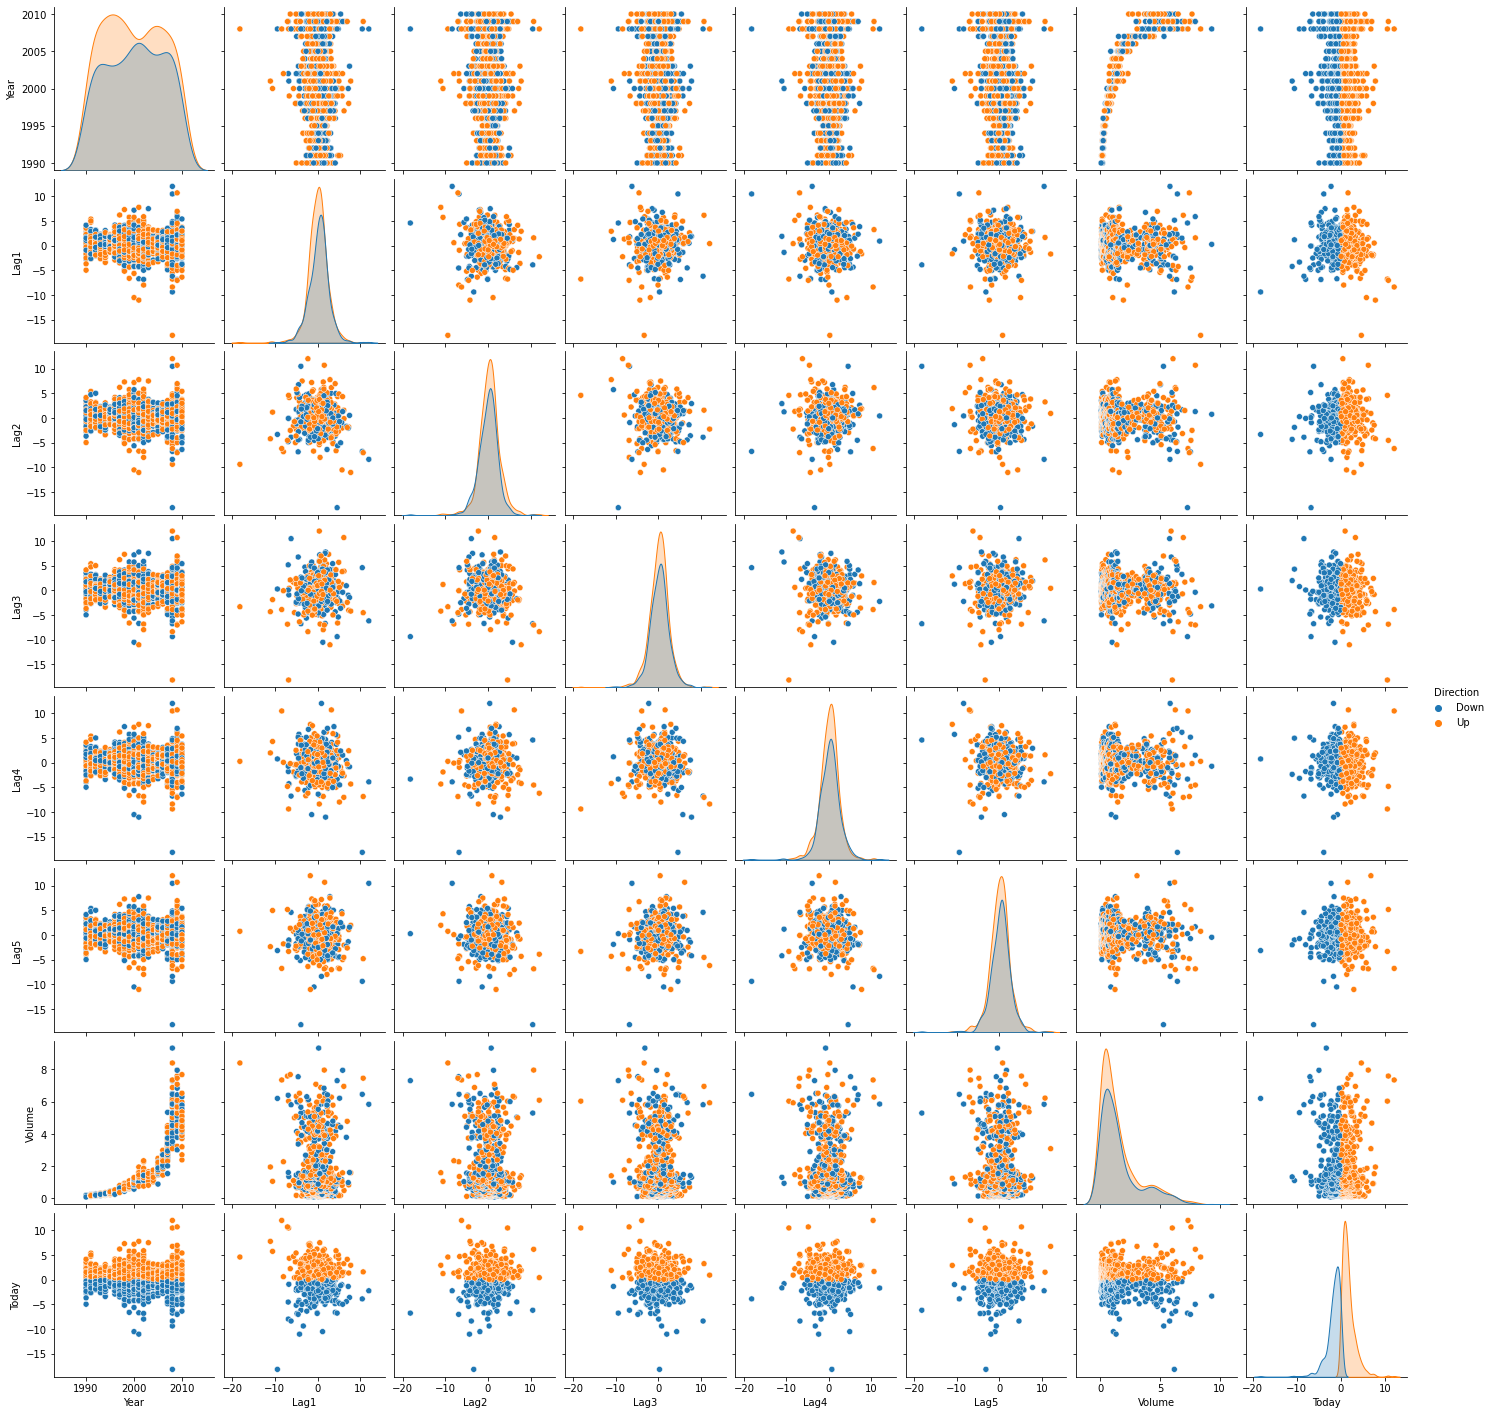

In [4]:
sns.pairplot(df, hue='Direction')

There seems to be some correlation between "Year" and "Volume", as well as a logistic relation between "Today" and "Direction" so let's examine these columns closer:

<AxesSubplot:xlabel='Direction', ylabel='Today'>

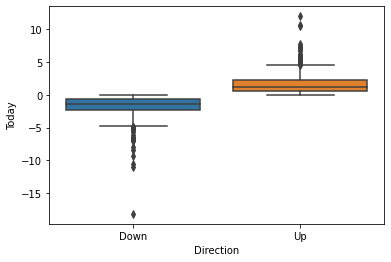

In [5]:
sns.boxplot(x=df['Direction'], y=df['Today'])

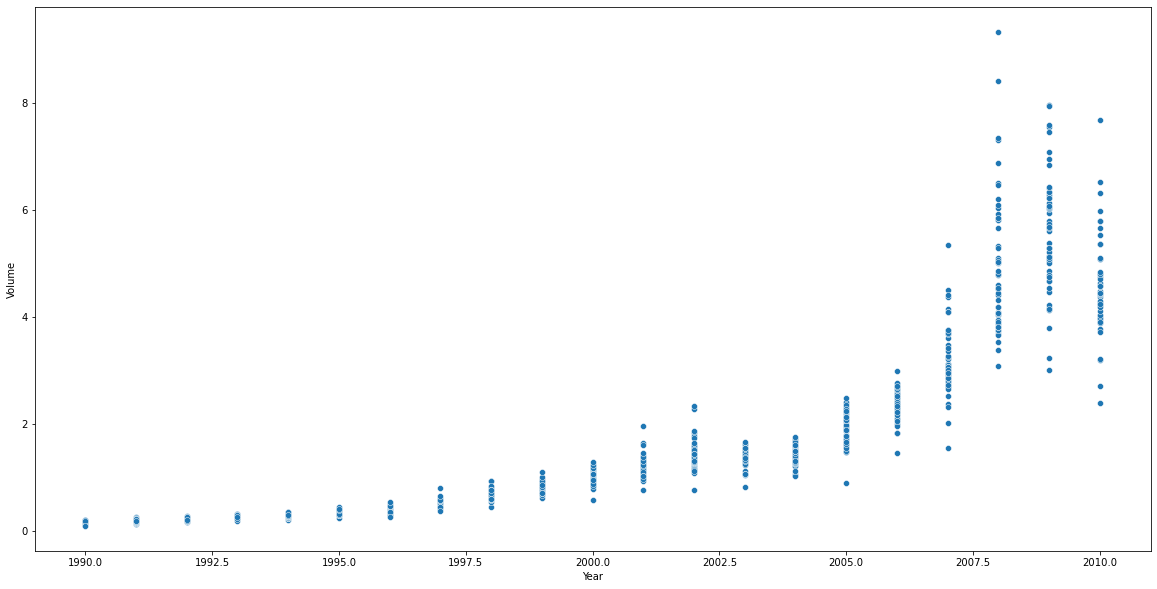

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x=df['Year'], y=df['Volume'], ax=ax)
plt.show()

There indeed seems to be some correlation (possibly exponential) between "Year" and "Volume", as well as a logistic relation between "Today" and "Direction". There might be some other relations between other columns, but to reveal them, we need more statistical analysis of the data

**(b) Fit the logistic regression model using a training data period from 1990 to 2008, with ````Lag2```` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010). Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.**

In [7]:
from sklearn.linear_model import LogisticRegression

X = df[df["Year"]<2009].Lag2.values.reshape(-1, 1)
y = df[df["Year"]<2009].Direction

logistic_sklearn = LogisticRegression()
logistic_sklearn_fit = logistic_sklearn.fit(X, y)

print("Intercept: {}".format(logistic_sklearn_fit.intercept_))
print("Coefficients: {}".format(logistic_sklearn_fit.coef_))

Intercept: [0.20326236]
Coefficients: [[0.05804742]]


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

# labeled confusion matrix for predicted values
X_test = df[df["Year"]>2008].Lag2.values.reshape(-1, 1)
y_test = df[df["Year"]>2008].Direction
y_pred = logistic_sklearn_fit.predict(X_test)
conf_m = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,9,34
1,5,56


In [9]:
acc = accuracy_score(y_test, y_pred)
training_error = 1 - acc
print('Accuracy: {}'.format(acc))
print('Training Error: {:.4f}'.format(training_error))

Accuracy: 0.625
Training Error: 0.3750


The confusion matrix provides useful insight to the accuracy of the model in different cases. From the confusion matrix, we can see that the model predicted 9 of the cases to be 0 (down) and 34 of the cases to be 1 (up) when the actual value was 0 (down). Therefore, for the weeks when the market went down, the model correctly predicted $\frac{9}{9+34}\cdot100\%=20.9\%$ of the cases, and for the weeks the market went up, the model predicted 5 of the cases to go down and 56 to go up, correctly predicting $\frac{56}{56+5}\cdot100\%=91.8\%$ of the cases. To get the total number of correct predictions, we can just sum along the diagonal of the confusion matrix, so the model, in general, was correct $\frac{9+56}{9+34+5+56}\cdot100\%=62.5\%$ of the time. 

**(c) Repeat (b) using LDA (Compute the confusion matrix and the overall fraction of correct predictions for the held out data)**

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

X = df[df["Year"]<2009].Lag2.values.reshape(-1, 1)
y = df[df["Year"]<2009].Direction

X_test = df[df["Year"]>2008].Lag2.values.reshape(-1, 1)
y_test = df[df["Year"]>2008].Direction

lda_model = LinearDiscriminantAnalysis()
lda_fit = lda_model.fit(X, y)

y_pred = lda_fit.predict(X_test)

conf_m = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,9,34
1,5,56


From the confusion matrix, we can see that the model predicted 9 of the cases to be 0 (down) and 34 of the cases to be 1 (up) when the actual value was 0 (down). Therefore, for the weeks when the market went down, the model correctly predicted $\frac{9}{9+34}\cdot100\%=20.9\%$ of the cases, and for the weeks the market went up, the model predicted 5 of the cases to go down and 56 to go up, correctly predicting $\frac{56}{56+5}\cdot100\%=91.8\%$ of the cases. To get the total number of correct predictions, we can just sum along the diagonal of the confusion matrix, so the model, in general, was correct $\frac{9+56}{9+34+5+56}\cdot100\%=62.5\%$ of the time. 

In [11]:
acc = accuracy_score(y_test, y_pred)
training_error = 1 - acc
print('Accuracy: {}'.format(acc))
print('Training Error: {:.4f}'.format(training_error))

Accuracy: 0.625
Training Error: 0.3750


**(d) Repeat (b) using QDA (Compute the confusion matrix and the overall fraction of correct predictions for the held out data)**

In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score


X = df[df["Year"]<2009].Lag2.values.reshape(-1, 1)
y = df[df["Year"]<2009].Direction

X_test = df[df["Year"]>2008].Lag2.values.reshape(-1, 1)
y_test = df[df["Year"]>2008].Direction

qda_model = QuadraticDiscriminantAnalysis()
qda_fit = qda_model.fit(X, y)

y_pred = qda_fit.predict(X_test)

conf_m = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,0,43
1,0,61


In [13]:
acc = accuracy_score(y_test, y_pred)
training_error = 1 - acc
print('Accuracy: {}'.format(acc))
print('Training Error: {:.4f}'.format(training_error))

Accuracy: 0.5865384615384616
Training Error: 0.4135


From the confusion matrix, we can see that the model always predicted the market to go up, even when the actual value was 0 (down). Therefore, for the weeks when the market went down, the model correctly predicted $0\%$ of the cases, and for the weeks the market went up, the model predicted $100\%$ of the cases correctly. The model, in general, was correct $\frac{61}{104}\cdot100\%=58.7\%$ of the time. 

**(e) Repeat (b) using KNN with $K=1$ (Compute the confusion matrix and the overall fraction of correct predictions for the held out data)**

In [14]:
from sklearn.neighbors import KNeighborsClassifier 

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_fit = knn_model.fit(X, y)

y_pred = knn_fit.predict(X_test)

conf_m = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,21,22
1,30,31


In [15]:
acc = accuracy_score(y_test, y_pred)
training_error = 1 - acc
print('Accuracy: {}'.format(acc))
print('Training Error: {:.4f}'.format(training_error))

Accuracy: 0.5
Training Error: 0.5000


From the confusion matrix, we can see that the model was about $50\%$ in both cases and in general.

# 5. Multi-class Classification (One-vs-the-rest and one-vs-one) (20pt)

**Build a classification model to classify the class of iris plant. For this, use ````sklearn.multiclass.OneVsOneClassifier```` and ````sklearn.multiclass.OneVsRestClassifier````. You are free to choose any classifier of your choice. Use train-test split of 80%:20%. Implement both one-vs-the-rest and one-vs-one.**

In [16]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC


df = pd.read_csv('data/iris.csv')
X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

clf_onevsone = OneVsOneClassifier(LinearSVC(random_state=0, dual=False)).fit(X_train, y_train)
y_test_pred_one = clf_onevsone.predict(X_test)
conf_m = pd.DataFrame(confusion_matrix(y_test, y_test_pred_one))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
print("OneVsOneClassifier:")
print(conf_m)

clf_onevsrest = OneVsRestClassifier(LinearSVC(random_state=0, dual=False)).fit(X_train, y_train)
y_test_pred_rest = clf_onevsrest.predict(X_test)
conf_m = pd.DataFrame(confusion_matrix(y_test, y_test_pred_rest))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
print("OneVsRestClassifier:")
print(conf_m)

OneVsOneClassifier:
Predicted   0   1  2
True                
0          11   0  0
1           0  13  0
2           0   0  6
OneVsRestClassifier:
Predicted   0   1  2
True                
0          11   0  0
1           0  13  0
2           0   0  6


# 6. Newton's Method (20pt)

**In Lecture 3, we learned about Newton's method and two different perspectives of deriving the Newton's method. For this question, implement Newton's method.**

Accuracy of Logistic Regression (Newton's method): 0.935


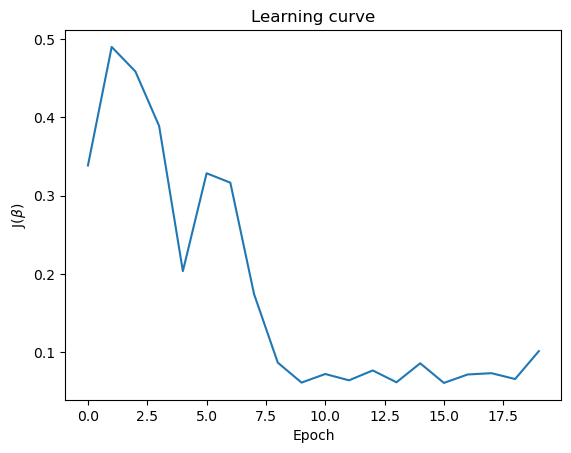

In [4]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from scipy.stats import logistic # Logistic function
import matplotlib.pyplot as plt

# load data
caravan = pd.read_csv('data/Caravan.csv', index_col=0)
caravan.Purchase = caravan.Purchase.astype('category')

X = caravan.iloc[:, 0:85].values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X = sm.add_constant(X)
y = caravan.Purchase.factorize()[0]

X_train = X[1001:]
y_train = y[1001:]
X_test = X[:1000]
y_test = y[:1000]

alpha = 0.001
beta = np.random.rand(X.shape[1])
epochs = 20  # The number of iterations to perform gradient descent
n = float(len(X_train)) # Number of elements in X

cost = []

# Performing Newton's method
######################## Write your answere here ########################s
for epoch in range(epochs): 
    epsilon = 1e-7
    y_train_pred = logistic.cdf(np.dot(X_train, beta))
    error = y_train_pred - y_train  
    W = np.diag(y_train_pred * (1 - y_train_pred))
    hessian = (1/n)*X_train.T.dot(W).dot(X_train)
    gradient = (1/n)*np.dot(X_train.T, error)
    hessian = hessian + epsilon * np.eye(hessian.shape[0]) # for numerical stability
    beta = beta - np.linalg.inv(hessian)@gradient

    J = (1/n) * np.dot(error.T, error)
    cost.append(J)
#########################################################################
plt.plot(np.arange(epochs), cost)
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel(r"J($\beta$)");
y_test_pred = logistic.cdf(np.dot(X_test, beta)) > 0.5 # 0.5 should be fixed.
acc = accuracy_score(y_test, y_test_pred)
print("Accuracy of Logistic Regression (Newton's method): {}".format(acc))